<a href="https://colab.research.google.com/github/sergiogarciag/hado/blob/main/naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def cargar_municipio(municipio, provincia):
  with open('/content/drive/My Drive/UNIRTFM/data/pernoctaciones/'+municipio+'.csv', 'r') as f:
    dfPernoctas = pd.read_csv(f, sep='|' , header=0, names=['date','origen', 'destino','y'])
    dfPernoctas['ds'] = pd.to_datetime(dfPernoctas['date'], format='%Y%m%d', errors='coerce')
    dfPernoctas = dfPernoctas.drop('date', axis=1)
    dfPernoctas = dfPernoctas[dfPernoctas['destino'] ==municipio]
    dfPernoctas = dfPernoctas[~dfPernoctas['origen'].astype(str).str.startswith(municipio[0:2])]
    dfPernoctas_grouped = dfPernoctas.groupby(['ds','destino'])['y'].sum().reset_index()
    dfPernoctas_grouped.head()
    #dfPernoctas_grouped['mes'] = dfPernoctas_grouped['ds'].dt.month
    #dfPernoctas_grouped['anio'] = dfPernoctas_grouped['ds'].dt.year
    dfPernoctas_grouped['diasemana'] = dfPernoctas_grouped['ds'].dt.dayofweek
    dfPernoctas_grouped['findesemana'] = np.logical_or(dfPernoctas_grouped['ds'].dt.dayofweek == 5, dfPernoctas_grouped['ds'].dt.dayofweek == 6).astype(int)
    dfPernoctas_grouped.set_index('ds', inplace=True)
    dfPernoctas_grouped = dfPernoctas_grouped.drop('destino', axis=1)
    return dfPernoctas_grouped

In [ ]:
municipio = '24089'
municipio = '03031'
municipio = '39075'


pernoctas = cargar_municipio(municipio,'')



In [ ]:

predicciones = pernoctas.copy()
#predicciones['y'][731:904] = predicciones['y'][367:540].values
predicciones['y'][731:904] = predicciones['y'][731-7:904-7].values

<ipython-input-5-4239c40220c6>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  predicciones['y'][731:904] = predicciones['y'][731-7:904-7].values
<ipython-input-5-4239c40220c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a co

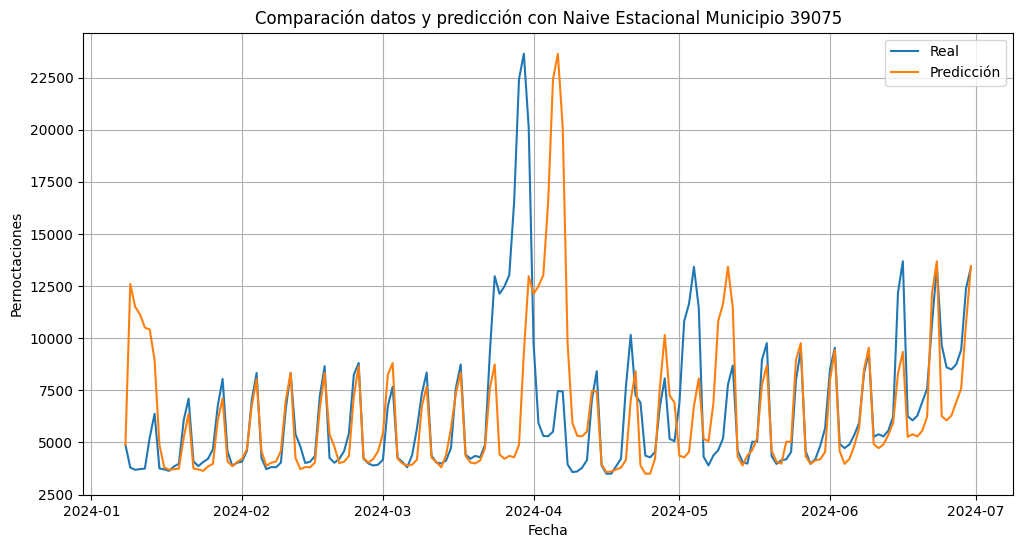

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(pernoctas.index[730:], pernoctas['y'][730:], label='Real')
plt.plot(predicciones.index[730:], predicciones['y'][730:], label='Predicción')

plt.xlabel('Fecha')
plt.ylabel('Pernoctaciones')
plt.title('Comparación datos y predicción con Naive Estacional Municipio ' + municipio)
plt.legend()
plt.grid(True)
filename = '/content/drive/My Drive/UNIRTFM/figuras/naiveestacional' + municipio + '.png'
plt.savefig(filename)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(pernoctas['y'].iloc[731:904], predicciones['y'].iloc[731:904])
print(mape)

0.2983016614033117


In [ ]:


filename_csv = '/content/drive/My Drive/UNIRTFM/resultados/naiveestacional' + municipio + '.csv'
predicciones.iloc[731:904].to_csv(filename_csv)



In [ ]:

import pandas as pd
import os
from datetime import datetime

def guardar_mape(metodo, municipio, mape):
  """Guarda el MAPE en un archivo CSV.

  Args:
    metodo: El método utilizado para calcular el MAPE.
    municipio: El municipio al que corresponde el MAPE.
    mape: El valor del MAPE.
  """
  timestamp_ejecucion = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
  file_path = '/content/drive/My Drive/UNIRTFM/resultados/mape.csv'

  if os.path.exists(file_path):
    df = pd.read_csv(file_path)
  else:
    df = pd.DataFrame(columns=['metodo', 'municipio', 'timestamp_ejecucion', 'mape'])

  new_data = pd.DataFrame({'metodo': [metodo],
                            'municipio': [municipio],
                            'timestamp_ejecucion': [timestamp_ejecucion],
                            'mape': [mape]})

  df = pd.concat([df, new_data], ignore_index=True)
  df.to_csv(file_path, index=False)

# Ejemplo de uso (reemplaza con tus valores reales)
guardar_mape("Naive Estacional", municipio, mape)